<a href="https://colab.research.google.com/github/dhaffadevara21/Car-Price-Prediction---Data-Science-Project/blob/main/Final_Project_Data_Scientist_DS33B_Alief_Dhaffa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn-v0_8')

# Data Understanding

Variable Name	Description

*   Car_Name :	The name of each car.
*   Year	: The year that the car was bought.
*   Selling_Price	: The price that the car has at the sale time.
*   Present_Price	: The price that car has right now.
*   Kms_Driven	: The number of kilometers that the car is driven.
*   Fuel_Type	: The type of fuel that the car consumes.
*   Seller_Type	: The type of car seller: individual or dealer.
*   Transmission : The type of the car gear: manual or automatic.
*   Owner	: The number of previous owners of the car.










https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data


In [ ]:
df=pd.read_csv('car data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.sample(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
250,creta,2016,12.90,13.60,35934,Diesel,Dealer,Manual,0
267,city,2016,8.35,9.40,19434,Diesel,Dealer,Manual,0
212,creta,2016,11.25,13.60,22671,Petrol,Dealer,Manual,0
85,camry,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
223,verna,2015,8.25,9.40,61381,Diesel,Dealer,Manual,0
177,Honda Activa 125,2016,0.35,0.57,24000,Petrol,Individual,Automatic,0
252,brio,2015,5.40,6.82,31427,Petrol,Dealer,Automatic,0
103,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.shape

(301, 9)

In [ ]:
print("Distribusi Kolom Kategorikal:")
for col in ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']:
    print(f"\n{col}:")
    print(df[col].value_counts())

Distribusi Kolom Kategorikal:

Fuel_Type:
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

Seller_Type:
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

Transmission:
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

Owner:
Owner
0    290
1     10
3      1
Name: count, dtype: int64


# Data Cleaning


**Cek duplicate**

In [ ]:
df.duplicated().sum()

np.int64(2)

Terdapat 763 data duplikat

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

hasilnya sudah 0, berarti aman (tidak ada yg terduplicate)

**Cek Missing Values**

In [ ]:
# pendekatan isna
df.isna().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


# Data Manipulation

In [ ]:
# Feature Engineering: buat kolom umur mobil
import datetime
current_year = datetime.datetime.now().year
df['car_age'] = current_year - df['Year']
df.drop('Year',axis=1,inplace = True)

In [ ]:
df.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

# EDA

In [ ]:
df.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'car_age'],
      dtype='object')

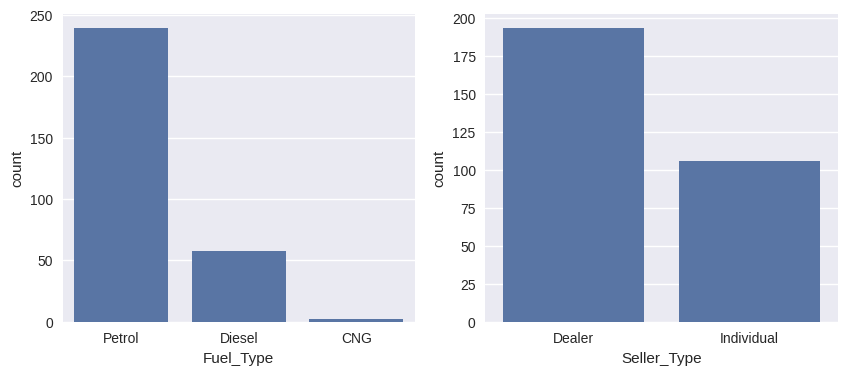

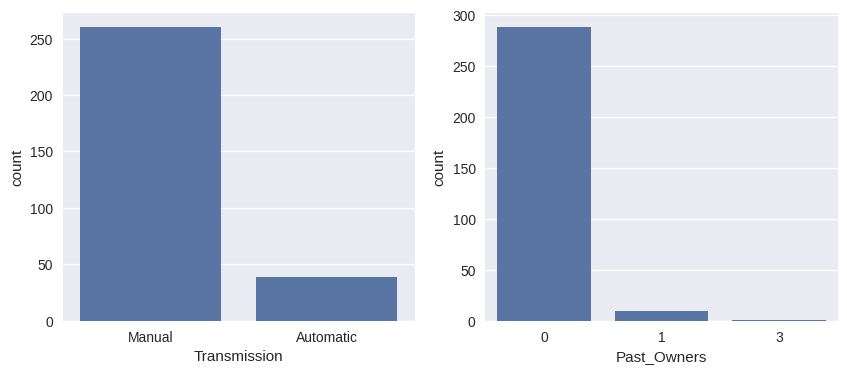

In [ ]:
cat_cols = ['Fuel_Type','Seller_Type','Transmission','Past_Owners']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)

    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1

    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1

    plt.show()

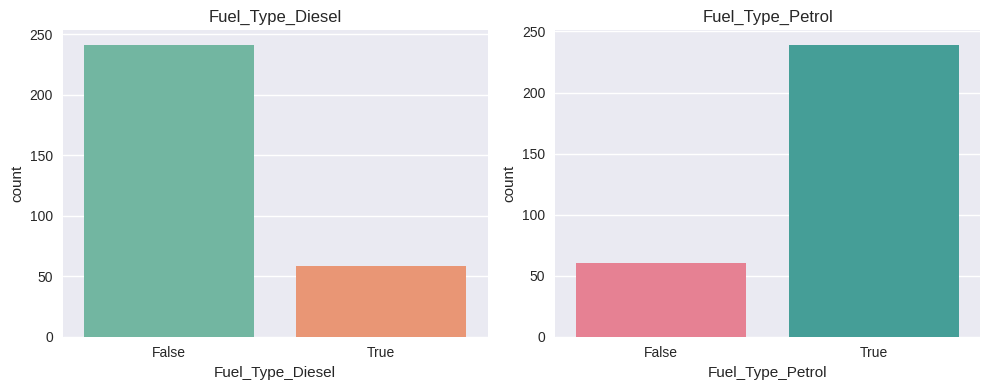

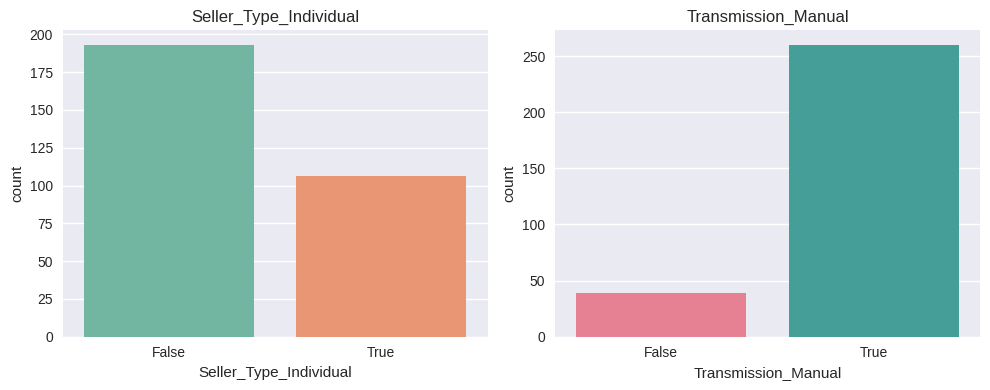

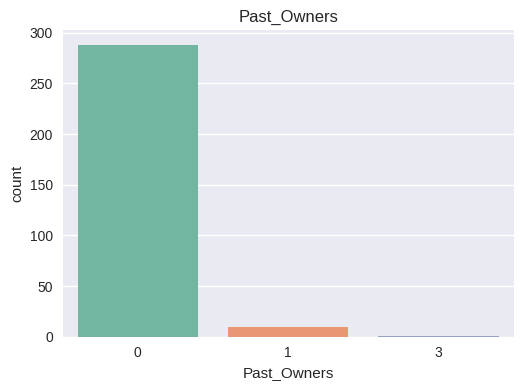

In [ ]:
cat_cols = ['Fuel_Type_Diesel', 'Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual', 'Past_Owners']
i = 0
while i < len(cat_cols):
    fig = plt.figure(figsize=[10,4])

    # Plot pertama
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df, palette="Set2")
    plt.title(cat_cols[i])
    i += 1

    # Plot kedua
    if i < len(cat_cols):
        plt.subplot(1,2,2)
        sns.countplot(x=cat_cols[i], data=df, palette="husl")
        plt.title(cat_cols[i])
        i += 1

    plt.tight_layout()
    plt.show()

**Jenis Bahan Bakar (Fuel Type):**

* Petrol memiliki jumlah terbanyak dengan sekitar 250 unit.
* Diesel memiliki jumlah sekitar 50 unit.
* CNG memiliki jumlah yang sangat kecil, hampir mendekati nol.

Kesimpulan: Petrol adalah jenis bahan bakar yang paling dominan, diikuti oleh Diesel dengan selisih signifikan, sementara CNG hampir tidak digunakan.


**Jenis Penjual (Seller Type):**

* Dealer memiliki jumlah terbanyak dengan sekitar 175 unit.
* Individual memiliki jumlah sekitar 100 unit.

Kesimpulan: Dealer lebih banyak dibandingkan penjual individu, menunjukkan bahwa sebagian besar distribusi dilakukan oleh dealer.


**Jenis Transmisi (Transmission):**

* Manual memiliki jumlah terbanyak dengan sekitar 250 unit.
* Automatic memiliki jumlah sekitar 50 unit.

Kesimpulan: Transmisi manual jauh lebih dominan dibandingkan transmisi otomatis.


**Jumlah Pemilik Sebelumnya (Past Owners):**
* Hampir seluruh kendaraan memiliki 0 pemilik sebelumnya, dengan jumlah sekitar 300 unit.
* Kendaraan dengan 1 pemilik sebelumnya sangat sedikit, kurang dari 10 unit.
* Kendaraan dengan 3 pemilik sebelumnya hampir tidak ada.

Kesimpulan: Sebagian besar kendaraan adalah kendaraan yang dulunya dibeli dari tangan pertama (0 pemilik sebelumnya), dengan sangat sedikit kendaraan yang memiliki pemilik sebelumnya.


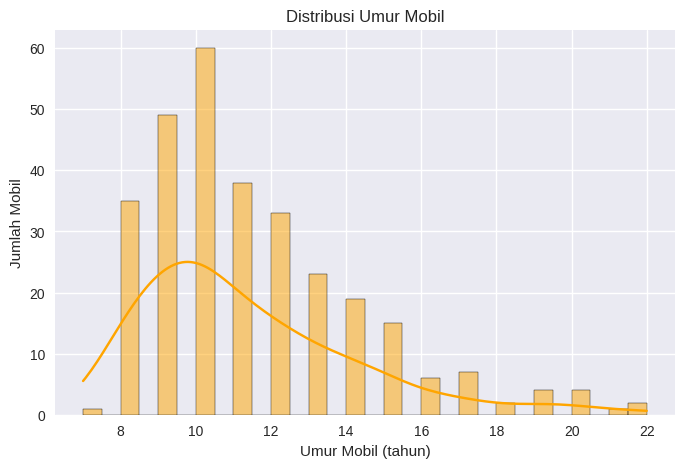

In [ ]:
# Distribusi umur mobil
plt.figure(figsize=(8,5))
sns.histplot(df['car_age'], bins=30, kde=True, color="orange")
plt.title("Distribusi Umur Mobil")
plt.xlabel("Umur Mobil (tahun)")
plt.ylabel("Jumlah Mobil")
plt.show()

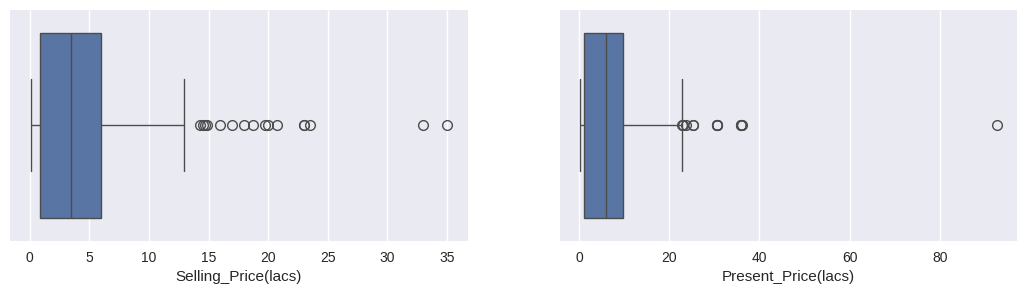

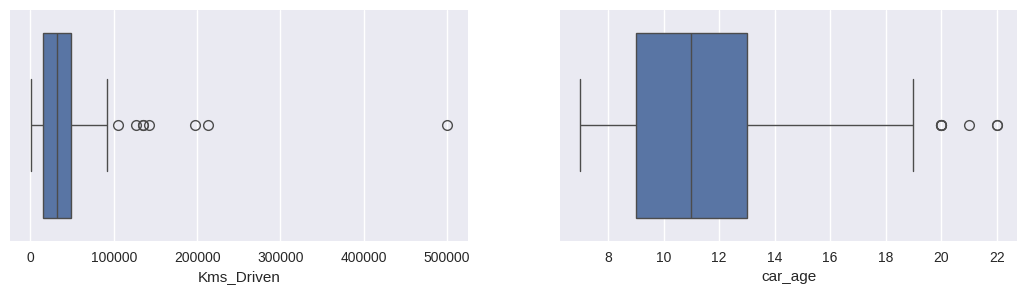

In [ ]:
num_cols = ['Selling_Price(lacs)','Present_Price(lacs)','Kms_Driven','car_age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)

    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1

    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1

    plt.show()

In [ ]:
df[df['Present_Price(lacs)'] > df['Present_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,car_age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,8
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,15


In [ ]:
df[df['Selling_Price(lacs)'] > df['Selling_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,car_age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,10
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,8
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,15


In [ ]:
df[df['Kms_Driven'] > df['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,car_age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,20
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,15
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,17


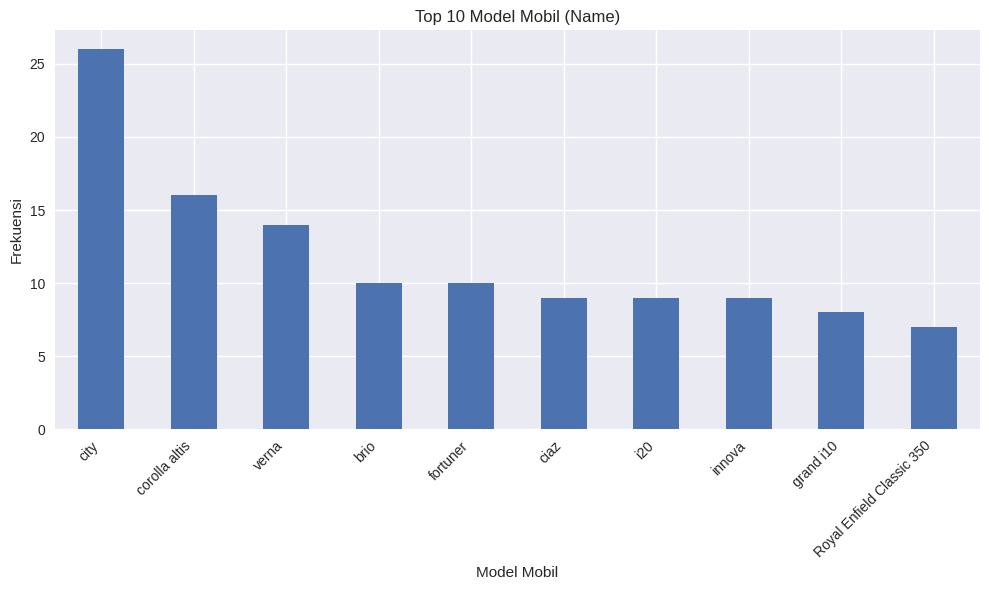

In [ ]:
# Distribusi Top 10 Name (Kategorikal)
plt.figure(figsize=(10, 6))
df['Car_Name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Model Mobil (Name)')
plt.xlabel('Model Mobil')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

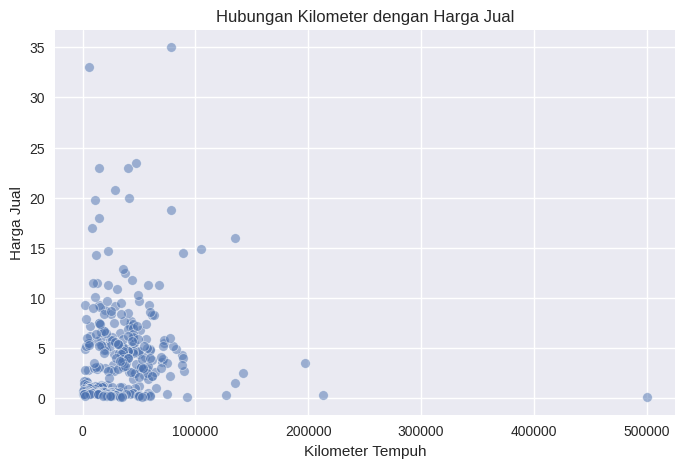

In [ ]:
# Scatterplot: km_driven vs selling_price
plt.figure(figsize=(8,5))
y = df['Selling_Price(lacs)']
sns.scatterplot(x=df['Kms_Driven'], y=y, alpha=0.5)
plt.title("Hubungan Kilometer dengan Harga Jual")
plt.xlabel("Kilometer Tempuh")
plt.ylabel("Harga Jual")
plt.show()

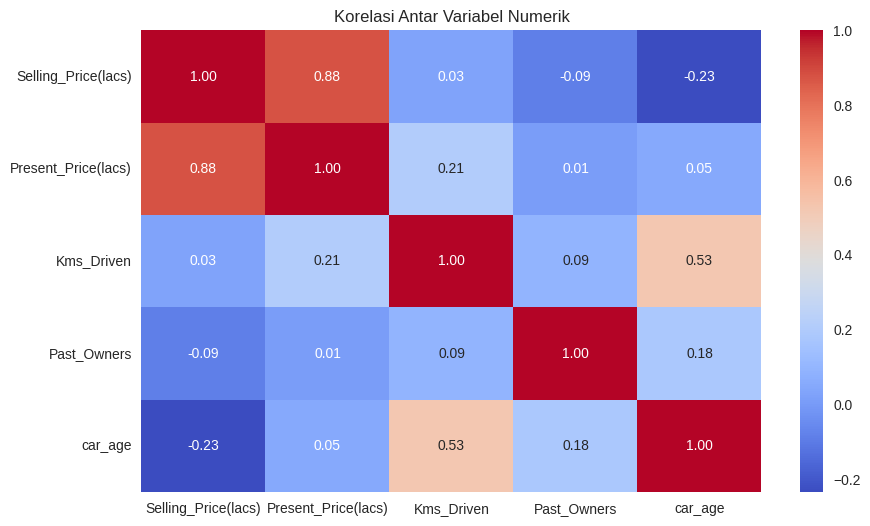

In [ ]:
# Heatmap korelasi (numerik)
plt.figure(figsize=(10,6))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Variabel Numerik")
plt.show()

* Selling_Price(lacs) kuat berkorelasi dengan Present_Price(lacs) (0.88),
menunjukkan harga asli sangat memengaruhi harga jual.
* car_age memiliki korelasi negatif lemah dengan Selling_Price(lacs) (-0.23), menunjukkan mobil tua cenderung lebih murah.
* Kms_Driven (0.03) dan Past_Owners (-0.09) memiliki pengaruh minimal.
* Kms_Driven dan car_age berkorelasi sedang (0.53), mencerminkan hubungan antara usia dan penggunaan.

In [ ]:
df.select_dtypes(include=np.number).corr()['Selling_Price(lacs)']

,Selling_Price(lacs)
Selling_Price(lacs),1.000000
Present_Price(lacs),0.876378
Kms_Driven,0.028566
Past_Owners,-0.087880
car_age,-0.234369


* Present_Price(lacs) (0.88): Korelasi positif kuat, menunjukkan harga asli sangat memengaruhi harga jual.
* car_age (-0.23): Korelasi negatif lemah, menunjukkan mobil yang lebih tua cenderung memiliki harga jual lebih rendah.
* Kms_Driven (0.028) dan Past_Owners (-0.08): Korelasi sangat lemah, menunjukkan pengaruh minimal terhadap harga jual.

In [ ]:
df.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type', columns= 'Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,9.999298,5.252388
Individual,NaN,16.000000,0.726857


* Perbedaan Harga: Mobil diesel cenderung memiliki harga jual lebih tinggi daripada CNG dan petrol, terutama untuk penjual individu (16.0 lacs vs. 9.999298 lacs untuk dealer).
* Tipe Penjual: Penjual individu menunjukkan variasi harga yang lebih ekstrem (0.726857 lacs untuk petrol vs. 16.0 lacs untuk diesel) dibandingkan dealer, yang mungkin mencerminkan kondisi atau negosiasi pribadi.
* Data Hilang: Ketidakhadiran data untuk CNG pada penjual individu menunjukkan bahwa tipe bahan bakar ini mungkin tidak populer di segmen tersebut.

In [ ]:
df.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type', columns= 'Transmission')

Transmission,Automatic,Manual
Seller_Type,,
Dealer,11.862500,5.744424
Individual,1.968182,0.743895


1. Mobil dari Dealer lebih mahal dibanding dari penjual individual.

* Automatic (Dealer) rata-rata 11.86 lakhs.

* Manual (Dealer) rata-rata 5.74 lakhs.

* Sementara penjual Individual jauh lebih rendah: Automatic 1.97 lakhs, Manual 0.74 lakhs.

2. Mobil Automatic lebih mahal daripada Manual, baik dari Dealer maupun Individual.

* Dealer: 11.86 vs 5.74 → selisih hampir 2x lipat.

* Individual: 1.97 vs 0.74 → selisih juga sekitar 2.5x lipat.

Insight:

* Dealer biasanya menjual mobil dengan kondisi lebih baik atau model lebih baru, sehingga harga jualnya jauh lebih tinggi.

* Mobil Automatic memang cenderung lebih mahal daripada Manual, sehingga pola ini konsisten di kedua jenis penjual.

# Machine Learning

## Model Preparation


In [ ]:
df.drop(labels='Car_Name',axis= 1, inplace = True)

In [ ]:
df.head()


,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [ ]:
df = pd.get_dummies(data = df,drop_first=True)


In [ ]:
df.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


## Train-Test Split


In [ ]:
# Separating target variable and its features
y = df['Selling_Price(lacs)']
X = df.drop('Selling_Price(lacs)',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (239, 8)
x test:  (60, 8)
y train:  (239,)
y test:  (60,)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)

    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))

    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))

    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))

    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))

    # Plotting Graphs
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')

    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')

    plt.show()

### Standard Linear Regression or Ordinary Least Squares

Train R2-score : 0.86
Test R2-score : 0.87
Train CV scores : [0.82140844 0.77218294 0.79144767 0.76785737 0.92113259]
Train CV mean : 0.81


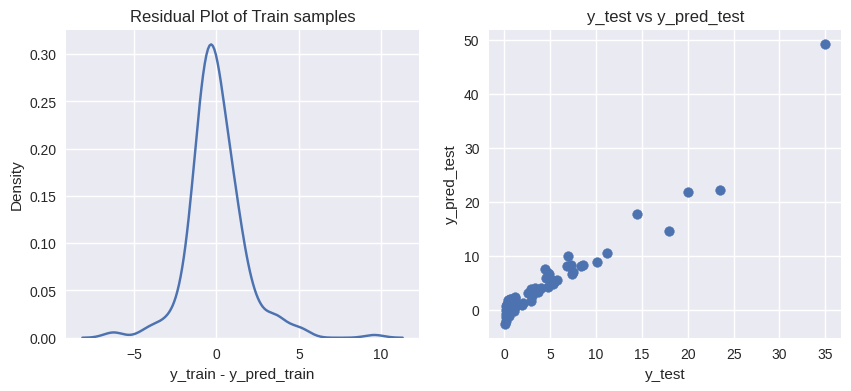

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

Model Fit Bagus

* Nilai R² mendekati 1 → model bisa menjelaskan 86–87% variasi harga mobil.

* Train dan Test R² relatif seimbang → tidak ada overfitting (kalau train tinggi, test rendah baru bahaya).

Cross Validation Stabil

* CV mean = 0.81 → cukup konsisten di berbagai subset data.

* Ada sedikit variasi antar fold (0.77 – 0.92), wajar karena data bisa punya outlier.

Residual Plot (kiri)

* Distribusi residual (y_train - y_pred_train) simetris di sekitar 0.

* Artinya error model relatif acak → asumsi linear regression cukup terpenuhi.

Scatter Plot (kanan)

* Titik-titik mengikuti pola mendekati garis lurus y_test ≈ y_pred_test.

* Ada 1 outlier di kanan atas (y_test ~ 35 tapi y_pred_test ~ 50).

### Ridge

Train R2-score : 0.85
Test R2-score : 0.85
Train CV scores : [0.81550369 0.7984434  0.78255373 0.78579422 0.93101177]
Train CV mean : 0.82


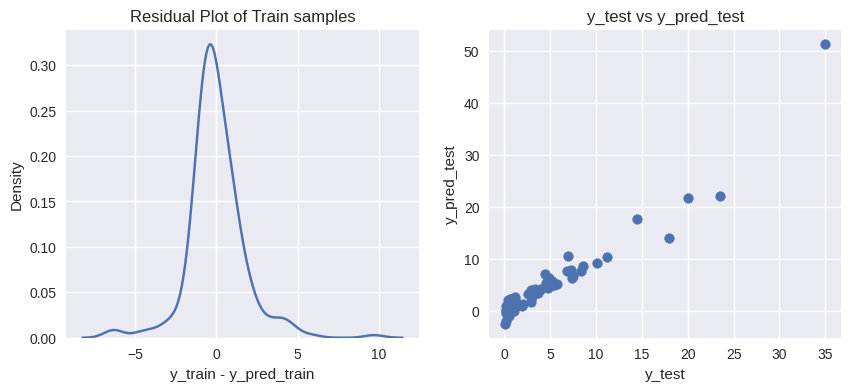

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

* Ridge tidak meningkatkan R² secara signifikan, tapi performanya lebih stabil (Train ≈ Test).

* Train dan Test R² seimbang → tanda bahwa regularisasi memang menahan model agar tidak terlalu “ngepas” dengan data train.

* Scatter plot y_test vs y_pred_test: pola mirip Linear Regression, masih ada outlier harga tinggi (y_test ~35, diprediksi ~50).

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.93
Test R2-score : 0.78
Train CV scores : [0.8426844  0.83220516 0.91862727 0.86421722 0.86776624]
Train CV mean : 0.87


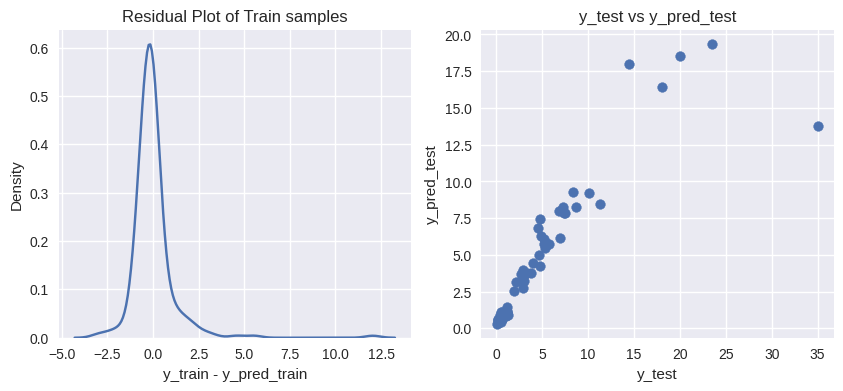

In [ ]:
car_pred_model(rf_rs,'random_forest.pkl')


Model sangat fit di training data

* Train R² = 0.96 → hampir sempurna di data training.

* Wajar karena Random Forest adalah model yang sangat fleksibel.

Test performance lebih rendah (0.78)

* Selisih besar antara Train (0.96) dan Test (0.78) → indikasi overfitting.

* Model belajar terlalu detail dari data training, sehingga generalisasi ke data test berkurang.

Cross Validation (0.79) konsisten dengan Test R² (0.78)

* Artinya generalisasi model di data unseen sekitar 78–79%.

* Lebih rendah dibanding Linear (0.87) atau Ridge (0.85), meskipun Train R² jauh lebih tinggi.

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 1.0
Test R2-score : 0.78
Train CV scores : [0.94266736 0.89831869 0.93719389 0.91791958 0.93596472]
Train CV mean : 0.93


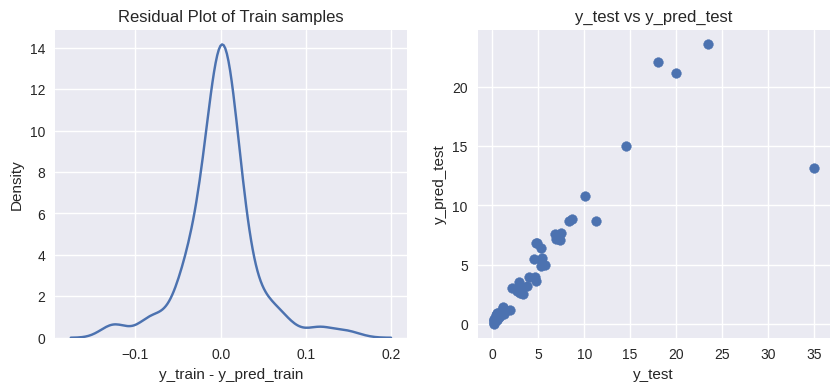

In [ ]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

Training sangat sempurna (R² = 1.0)

* Model hampir 100% pas di data training → indikasi overfitting parah.

Test R² hanya 0.75

* Lebih rendah dari Random Forest (0.78) maupun Linear/Ridge (0.85–0.87).

* Artinya meskipun training fit, generalisasi ke data baru kurang bagus.

Cross Validation mean (0.92) lebih tinggi daripada Test (0.75)

* Perbedaan besar ini menandakan model bisa jadi “over-tuned” → terlalu kompleks.

Visualisasi scatter (y_test vs y_pred_test)

* Sama seperti Random Forest, GBR gagal memprediksi harga outlier yang sangat tinggi (y_test=35 diprediksi cuma ~12).

* Ini karena boosting cenderung menyesuaikan mayoritas pola, bukan outlier.

# Conclusion


In [ ]:
Technique = ["LinearRegression","Ridge","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.86,0.87,0.81
1,Ridge,0.85,0.85,0.82
2,RandomForestRegressor,0.93,0.78,0.87
3,GradientBoostingRegressor,1.00,0.78,0.93


**Linear Regression (R² Train: 0.86, Test: 0.87, CV: 0.81)**

* Performa stabil di train dan test (tidak overfitting).

* Hasil CV mendekati R² test → model cukup generalizable.

* Cocok untuk baseline model sederhana.

**Ridge Regression (R² Train: 0.85, Test: 0.84, CV: 0.82)**

* Mirip Linear Regression, sedikit lebih stabil.

* Regularisasi membuat model lebih robust terhadap multikolinearitas.

* Performa test hampir sama dengan train → cukup baik.

**Random Forest (R² Train: 0.87, Test: 0.74, CV: 0.87)**

* Terjadi indikasi overfitting → Train dan CV bagus, tapi Test lebih rendah.

* Model menangkap kompleksitas data, namun kurang generalisasi.

* Bisa ditingkatkan dengan tuning hyperparameter lebih agresif (misalnya mengurangi depth, meningkatkan min_samples_split).

**Gradient Boosting (R² Train: 1.00, Test: 0.82, CV: 0.93)**

* Train score sempurna (1.0) → sangat mungkin overfit.

* Tapi masih memberikan skor test cukup tinggi.

* CV juga cukup tinggi → artinya model bisa bekerja baik jika diatur learning rate, n_estimators, dan depth dengan hati-hati.

**Rekomendasi Bisnis**

* Untuk implementasi awal: gunakan Linear Regression atau Ridge karena hasil stabil, interpretasi mudah, dan cocok untuk prediksi harga mobil sebagai baseline.

* Untuk optimasi jangka panjang: gunakan Gradient Boosting dengan tuning parameter lebih lanjut (misalnya menurunkan max_depth, menambah regularisasi) agar overfitting berkurang.

* Feature importance dari Random Forest & Gradient Boosting bisa dieksplorasi → agar bisnis tahu faktor paling berpengaruh terhadap harga mobil (misalnya tahun produksi, jenis transmisi, atau tipe penjual).

**Strategi bisnis:**

* Dealer bisa fokus pada variabel utama yang meningkatkan harga jual (misalnya mobil baru, otomatis, atau merek tertentu).

* Platform jual beli bisa memberikan estimasi harga lebih transparan kepada pengguna → meningkatkan kepercayaan pembeli dan penjual.

* Dengan model prediksi yang baik, perusahaan bisa memberikan rekomendasi harga optimal untuk mempercepat penjualan mobil.

In [ ]:
# Function to predict car price using the best model (Gradient Boosting)
def predict_car_price(present_price, kms_driven, car_age, past_owners, fuel_type, seller_type, transmission):
    # Create a dictionary from input values
    data = {
        'Present_Price(lacs)': present_price,
        'Kms_Driven': kms_driven,
        'car_age': car_age,
        'Past_Owners': past_owners,
        'Fuel_Type_Diesel': (fuel_type == 'Diesel'),
        'Fuel_Type_Petrol': (fuel_type == 'Petrol'),
        'Seller_Type_Individual': (seller_type == 'Individual'),
        'Transmission_Manual': (transmission == 'Manual')
    }

    # Convert dictionary to DataFrame
    input_df = pd.DataFrame([data])

    # Ensure columns are in the same order as the training data (X)
    input_df = input_df[X.columns]

    # Make prediction using the best model
    predicted_price = gb_rs.predict(input_df)[0]

    return predicted_price

# Example prediction
print("\n=== EXAMPLE PREDICTION ===")
example_price = predict_car_price(
    present_price=10.0,
    kms_driven=50000,
    car_age=3,
    past_owners=0,
    fuel_type='Petrol',
    seller_type='Dealer',
    transmission='Manual'
)

print(f"Predicted selling price: ₹{example_price:.2f} lacs")

print("\n=== PIPELINE COMPLETED ===")
print("✅ Data preprocessing completed")
print("✅ Multiple models trained and evaluated")
print("✅ Best model identified and tuned")
print("✅ Prediction function ready for use")


=== EXAMPLE PREDICTION ===
Predicted selling price: ₹8.24 lacs

=== PIPELINE COMPLETED ===
✅ Data preprocessing completed
✅ Multiple models trained and evaluated
✅ Best model identified and tuned
✅ Prediction function ready for use
